<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/cellulares_modelo_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files
import pandas as pd

# Esto abrirá una ventana para que selecciones tu archivo Excel
uploaded = files.upload()

# Una vez subido, el archivo estará disponible en el entorno de Colab
# y podrás ver su nombre
for fn in uploaded.keys():
  print('Archivo subido: "{name}" con un tamaño de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Reemplaza 'tu_archivo.xlsx' con el nombre real de tu archivo subido
# que viste en el mensaje anterior
file_name = list(uploaded.keys())[0] # Esto toma el nombre del primer archivo subido
df = pd.read_excel(file_name)

print("\n¡Archivo Excel cargado exitosamente!")

Saving Mobiles Dataset (2025).xlsx to Mobiles Dataset (2025).xlsx
Archivo subido: "Mobiles Dataset (2025).xlsx" con un tamaño de 92662 bytes

¡Archivo Excel cargado exitosamente!


In [35]:
# Ver las primeras 5 filas del DataFrame
print("Primeras 5 filas del DataFrame:")
print(df.head())

# Ver las últimas 5 filas del DataFrame
# print("\nÚltimas 5 filas del DataFrame:")
# print(df.tail())

# Obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos)
print("\nInformación general del DataFrame:")
df.info()

# Obtener estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(df.describe())

# Ver los nombres de todas las columnas
print("\nNombres de las columnas:")
print(df.columns)

# Ver el número de filas y columnas
print("\nDimensiones del DataFrame (filas, columnas):")
print(df.shape)

Primeras 5 filas del DataFrame:
   Marca                Modelo  Peso del Movil  RAM Camara Frontal  \
0  Apple       iPhone 16 128GB           174.0  6.0           12MP   
1  Apple       iPhone 16 256GB           174.0  6.0           12MP   
2  Apple       iPhone 16 512GB           174.0  6.0           12MP   
3  Apple  iPhone 16 Plus 128GB           203.0  6.0           12MP   
4  Apple  iPhone 16 Plus 256GB           203.0  6.0           12MP   

  Camara Trasera Procesador   Capacidad de Bateria Tamaño de Pantalla  \
0             48  A17 Bionic                   3.6               6.1    
1             48  A17 Bionic                   3.6               6.1    
2             48  A17 Bionic                   3.6               6.1    
3             48  A17 Bionic                   4.2               6.7    
4             48  A17 Bionic                   4.2               6.7    

  Precio de Lanzamiento  (Pakistan) Precio de Lanzamiento (India)  \
0                           224.999    

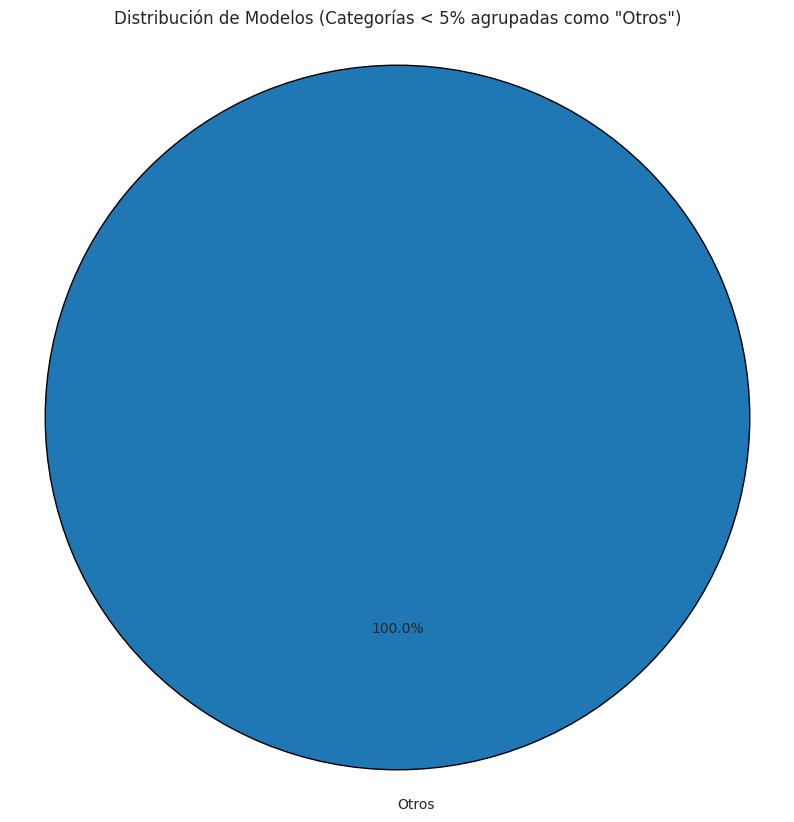


Se agruparon las categorías de 'Modelo' que representaban menos del 5% en 'Otros'.
Nuevas categorías y sus conteos:
Modelo_Agrupado
Otros    930
Name: count, dtype: int64


In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que tu DataFrame 'df' esté cargado.

# --- Preparación para agrupar categorías en la columna "Modelo" ---

# Contar la frecuencia de cada modelo
modelo_counts = df['Modelo'].value_counts()

# Calcular el porcentaje de cada categoría
total_modelos = modelo_counts.sum()
modelo_percentages = modelo_counts / total_modelos * 100

# Definir un umbral de porcentaje. Categorías por debajo de este umbral serán agrupadas.
# Puedes ajustar este valor si lo deseas.
umbral_porcentaje = 5 # Por ejemplo, agrupar todo lo que sea menos del 5%

# Identificar las categorías que están por debajo del umbral
categorias_a_agrupar = modelo_percentages[modelo_percentages < umbral_porcentaje].index

# Crear una nueva columna para el gráfico de torta, donde las categorías pequeñas se agrupan
df_agrupado = df.copy() # Hacemos una copia para no modificar el DataFrame original
df_agrupado['Modelo_Agrupado'] = df_agrupado['Modelo'].apply(
    lambda x: 'Otros' if x in categorias_a_agrupar else x
)

# Volver a contar las frecuencias para la columna agrupada
modelo_agrupado_counts = df_agrupado['Modelo_Agrupado'].value_counts()

# --- Gráfico de Torta con categorías agrupadas para "Modelo" ---

plt.figure(figsize=(10, 10)) # Ajusta el tamaño del gráfico para mejor visibilidad
plt.pie(modelo_agrupado_counts, labels=modelo_agrupado_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title(f'Distribución de Modelos (Categorías < {umbral_porcentaje}% agrupadas como "Otros")')
plt.axis('equal') # Asegura que el círculo sea un círculo
plt.show()

print(f"\nSe agruparon las categorías de 'Modelo' que representaban menos del {umbral_porcentaje}% en 'Otros'.")
print("Nuevas categorías y sus conteos:")
print(modelo_agrupado_counts)